In [83]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.spatial import KDTree

In [1]:


# Function to implement the Mean Shift segmentation algorithm
def mean_shift_segmentation(image, spatial_radius, range_radius, max_iterations=100):
    """
    Apply Mean Shift segmentation to an image.

    Parameters:
        image (ndarray): Input RGB image.
        spatial_radius (float): Spatial domain kernel radius.
        range_radius (float): Range domain kernel radius.
        max_iterations (int): Maximum number of iterations.

    Returns:
        segmented_image (ndarray): Segmented RGB image.
    """
    # Convert the image to a 5D array: spatial (x, y) + color (R, G, B)
    height, width, channels = image.shape
    flat_image = np.zeros((height * width, 5), dtype=np.float32)
    
    for y in range(height):
        for x in range(width):
            flat_image[y * width + x] = np.array([x, y, *image[y, x]])

    # Mean Shift procedure
    for iteration in range(max_iterations):
        print(f"Iteration {iteration + 1}/{max_iterations}")
        for i in range(flat_image.shape[0]):
            point = flat_image[i]
            distances = np.linalg.norm(flat_image[:, :2] - point[:2], axis=1)
            color_distances = np.linalg.norm(flat_image[:, 2:] - point[2:], axis=1)
            mask = (distances < spatial_radius) & (color_distances < range_radius)
            flat_image[i] = np.mean(flat_image[mask], axis=0)

    # Reshape the flat_image back to the original image shape
    segmented_image = flat_image[:, 2:].reshape((height, width, channels)).astype(np.uint8)
    return segmented_image



In [109]:

# Function to implement the Mean Shift segmentation algorithm
def mean_shift_segmentation(image, spatial_radius, range_radius, max_iterations=100):
    """
    Apply Mean Shift segmentation to an image.

    Parameters:
        image (ndarray): Input RGB image.
        spatial_radius (float): Spatial domain kernel radius.
        range_radius (float): Range domain kernel radius.
        max_iterations (int): Maximum number of iterations.

    Returns:
        segmented_image (ndarray): Segmented RGB image.
    """
    # Convert the image to a 5D array: spatial (x, y) + color (R, G, B)
    height, width, channels = image.shape
    flat_image = np.zeros((height * width, 5), dtype=np.float32)
    
    for y in range(height):
        for x in range(width):
            flat_image[y * width + x] = np.array([x, y, *image[y, x]])

    # Mean Shift procedure
    for iteration in range(max_iterations):
        print(f"Iteration {iteration + 1}/{max_iterations}")
        for i in range(flat_image.shape[0]):
            point = flat_image[i]
            distances = np.linalg.norm(flat_image[:, :2] - point[:2], axis=1)
            color_distances = np.linalg.norm(flat_image[:, 2:] - point[2:], axis=1)
            mask = (distances < spatial_radius) & (color_distances < range_radius)
            
            # Apply Gaussian weights
            spatial_weights = np.exp(-(distances[mask]**2) / (2 * (spatial_radius**2)))
            range_weights = np.exp(-(color_distances[mask]**2) / (2 * (range_radius**2)))
            weights = spatial_weights * range_weights
            
            weighted_sum = np.sum(flat_image[mask] * weights[:, np.newaxis], axis=0)
            flat_image[i] = weighted_sum / np.sum(weights)

    # Handle outliers
    mean_colors = np.mean(flat_image[:, 2:], axis=0)
    std_colors = np.std(flat_image[:, 2:], axis=0)
    threshold = 3 * std_colors  # Define outliers as points beyond 3 standard deviations
    for i in range(flat_image.shape[0]):
        color_distance = np.abs(flat_image[i, 2:] - mean_colors)
        if np.any(color_distance > threshold):
            flat_image[i, 2:] = mean_colors  # Replace outliers with the mean color
            
    # Reshape the flat_image back to the original image shape
    segmented_image = flat_image[:, 2:].reshape((height, width, channels)).astype(np.uint8)
    return segmented_image


In [102]:

# Function to implement the Mean Shift segmentation algorithm
def mean_shift_segmentation(image, spatial_radius, range_radius, max_iterations=100):
    """
    Apply Mean Shift segmentation to an image.

    Parameters:
        image (ndarray): Input RGB image.
        spatial_radius (float): Spatial domain kernel radius.
        range_radius (float): Range domain kernel radius.
        max_iterations (int): Maximum number of iterations.

    Returns:
        segmented_image (ndarray): Segmented RGB image.
    """
    # Convert the image to a 5D array: spatial (x, y) + color (R, G, B)
    height, width, channels = image.shape
    flat_image = np.zeros((height * width, 5), dtype=np.float32)
    
    for y in range(height):
        for x in range(width):
            flat_image[y * width + x] = np.array([x, y, *image[y, x]])

    # Mean Shift procedure
    for iteration in range(max_iterations):
        print(f"Iteration {iteration + 1}/{max_iterations}")
        for i in range(flat_image.shape[0]):
            point = flat_image[i]
            distances = np.linalg.norm(flat_image[:, :2] - point[:2], axis=1)
            color_distances = np.linalg.norm(flat_image[:, 2:] - point[2:], axis=1)
            
            # Adjust kernel sizes dynamically based on local density
            local_density = np.sum((distances < spatial_radius) & (color_distances < range_radius))
            dynamic_spatial_radius = max(spatial_radius * (local_density / 100), 1)
            dynamic_range_radius = max(range_radius * (local_density / 100), 1)

            mask = (distances < dynamic_spatial_radius) & (color_distances < dynamic_range_radius)
            
            # Apply Gaussian weights
            spatial_weights = np.exp(-(distances[mask]**2) / (2 * (dynamic_spatial_radius**2)))
            range_weights = np.exp(-(color_distances[mask]**2) / (2 * (dynamic_range_radius**2)))
            weights = spatial_weights * range_weights
            
            weighted_sum = np.sum(flat_image[mask] * weights[:, np.newaxis], axis=0)
            flat_image[i] = weighted_sum / np.sum(weights)




            
    # Reshape the flat_image back to the original image shape
    segmented_image = flat_image[:, 2:].reshape((height, width, channels)).astype(np.uint8)
    return segmented_image

In [ ]:
# Function to implement the Mean Shift segmentation algorithm
def mean_shift_segmentation(image, spatial_radius, range_radius, max_iterations=100):
    """
    Apply Mean Shift segmentation to an image.

    Parameters:
        image (ndarray): Input RGB image.
        spatial_radius (float): Spatial domain kernel radius.
        range_radius (float): Range domain kernel radius.
        max_iterations (int): Maximum number of iterations.

    Returns:
        segmented_image (ndarray): Segmented RGB image.
    """
    # Convert the image to a 5D array: spatial (x, y) + color (R, G, B)
    height, width, channels = image.shape
    flat_image = np.zeros((height * width, 5), dtype=np.float32)
    
    for y in range(height):
        for x in range(width):
            flat_image[y * width + x] = np.array([x, y, *image[y, x]])

    # Mean Shift procedure
    for iteration in range(max_iterations):
        print(f"Iteration {iteration + 1}/{max_iterations}")
        for i in range(flat_image.shape[0]):
            point = flat_image[i]
            distances = np.linalg.norm(flat_image[:, :2] - point[:2], axis=1)
            color_distances = np.linalg.norm(flat_image[:, 2:] - point[2:], axis=1)
            
            # Adjust kernel sizes dynamically based on local density
            local_density = np.sum((distances < spatial_radius) & (color_distances < range_radius))
            dynamic_spatial_radius = max(spatial_radius * (local_density / 100), 1)
            dynamic_range_radius = max(range_radius * (local_density / 100), 1)

            mask = (distances < dynamic_spatial_radius) & (color_distances < dynamic_range_radius)
            
            # Apply Gaussian weights
            spatial_weights = np.exp(-(distances[mask]**2) / (2 * (dynamic_spatial_radius**2)))
            range_weights = np.exp(-(color_distances[mask]**2) / (2 * (dynamic_range_radius**2)))
            weights = spatial_weights * range_weights
            
            weighted_sum = np.sum(flat_image[mask] * weights[:, np.newaxis], axis=0)
            flat_image[i] = weighted_sum / np.sum(weights)

    # Handle outliers
    mean_colors = np.mean(flat_image[:, 2:], axis=0)
    std_colors = np.std(flat_image[:, 2:], axis=0)
    threshold = 3 * std_colors  # Define outliers as points beyond 3 standard deviations
    for i in range(flat_image.shape[0]):
        color_distance = np.abs(flat_image[i, 2:] - mean_colors)
        if np.any(color_distance > threshold):
            flat_image[i, 2:] = mean_colors  # Replace outliers with the mean color

    # Reshape the flat_image back to the original image shape
    segmented_image = flat_image[:, 2:].reshape((height, width, channels)).astype(np.uint8)
    return segmented_image

In [117]:
#now#now#now#now#now#now#now#now
# Function to implement the Mean Shift segmentation algorithm
def mean_shift_segmentation(image, spatial_radius, range_radius, max_iterations=100):
    """
    Apply Mean Shift segmentation to an image.

    Parameters:
        image (ndarray): Input RGB image.
        spatial_radius (float): Spatial domain kernel radius.
        range_radius (float): Range domain kernel radius.
        max_iterations (int): Maximum number of iterations.

    Returns:
        segmented_image (ndarray): Segmented RGB image.
    """
    # Convert the image to a 5D array: spatial (x, y) + color (R, G, B)
    height, width, channels = image.shape
    flat_image = np.zeros((height * width, 5), dtype=np.float32)
    
    for y in range(height):
        for x in range(width):
            flat_image[y * width + x] = np.array([x, y, *image[y, x]])

    # Build a KD-tree for fast neighbor lookup
    kd_tree = KDTree(flat_image[:, :2])

    # Mean Shift procedure
    for iteration in range(max_iterations):
        print(f"Iteration {iteration + 1}/{max_iterations}")
        for i in range(flat_image.shape[0]):
            point = flat_image[i]

            # Query neighbors within spatial radius
            spatial_neighbors = kd_tree.query_ball_point(point[:2], spatial_radius)
            
            distances = np.linalg.norm(flat_image[spatial_neighbors, :2] - point[:2], axis=1)
            color_distances = np.linalg.norm(flat_image[spatial_neighbors, 2:] - point[2:], axis=1)

            mask = (distances < spatial_radius) & (color_distances < range_radius)
            neighbors = np.array(spatial_neighbors)[mask]

            # Apply Gaussian weights
            spatial_weights = np.exp(-(distances[mask]**2) / (2 * (spatial_radius**2)))
            range_weights = np.exp(-(color_distances[mask]**2) / (2 * (range_radius**2)))
            weights = spatial_weights * range_weights

            weighted_sum = np.sum(flat_image[neighbors] * weights[:, np.newaxis], axis=0)
            flat_image[i] = weighted_sum / np.sum(weights)

    # Handle outliers
    mean_colors = np.mean(flat_image[:, 2:], axis=0)
    std_colors = np.std(flat_image[:, 2:], axis=0)
    threshold = 3 * std_colors  # Define outliers as points beyond 3 standard deviations
    for i in range(flat_image.shape[0]):
        color_distance = np.abs(flat_image[i, 2:] - mean_colors)
        if np.any(color_distance > threshold):
            flat_image[i, 2:] = mean_colors  # Replace outliers with the mean color

    # Reshape the flat_image back to the original image shape
    segmented_image = flat_image[:, 2:].reshape((height, width, channels)).astype(np.uint8)
    return segmented_image

In [140]:
#now
# Function to implement the Mean Shift segmentation algorithm
def mean_shift_segmentation(image, spatial_radius, range_radius, max_iterations=100, use_gaussian_weights=True, handle_outliers=True):
    """
    Apply Mean Shift segmentation to an image.

    Parameters:
        image (ndarray): Input RGB image.
        spatial_radius (float): Spatial domain kernel radius.
        range_radius (float): Range domain kernel radius.
        max_iterations (int): Maximum number of iterations.
        use_gaussian_weights (bool): Whether to apply Gaussian weights.
        handle_outliers (bool): Whether to handle outliers.

    Returns:
        segmented_image (ndarray): Segmented RGB image.
    """
    # Convert the image to a 5D array: spatial (x, y) + color (R, G, B)
    height, width, channels = image.shape
    flat_image = np.zeros((height * width, 5), dtype=np.float32)
    
    for y in range(height):
        for x in range(width):
            flat_image[y * width + x] = np.array([x, y, *image[y, x]])

    # Build a KD-tree for fast neighbor lookup
    kd_tree = KDTree(flat_image[:, :2])

    # Mean Shift procedure
    for iteration in range(max_iterations):
        print(f"Iteration {iteration + 1}/{max_iterations}")
        for i in range(flat_image.shape[0]):
            point = flat_image[i]

            # Query neighbors within spatial radius
            spatial_neighbors = kd_tree.query_ball_point(point[:2], spatial_radius)
            
            distances = np.linalg.norm(flat_image[spatial_neighbors, :2] - point[:2], axis=1)
            color_distances = np.linalg.norm(flat_image[spatial_neighbors, 2:] - point[2:], axis=1)

            mask = (distances < spatial_radius) & (color_distances < range_radius)
            neighbors = np.array(spatial_neighbors)[mask]

            if use_gaussian_weights:
                # Apply Gaussian weights
                spatial_weights = np.exp(-(distances[mask]**2) / (2 * (spatial_radius**2)))
                range_weights = np.exp(-(color_distances[mask]**2) / (2 * (range_radius**2)))
                weights = spatial_weights * range_weights

                weighted_sum = np.sum(flat_image[neighbors] * weights[:, np.newaxis], axis=0)
                flat_image[i] = weighted_sum / np.sum(weights)
            else:
                # Simple mean without weights
                flat_image[i] = np.mean(flat_image[neighbors], axis=0)

    if handle_outliers:
        # Handle outliers
        mean_colors = np.mean(flat_image[:, 2:], axis=0)
        std_colors = np.std(flat_image[:, 2:], axis=0)
        threshold = 3 * std_colors  # Define outliers as points beyond 3 standard deviations
        for i in range(flat_image.shape[0]):
            color_distance = np.abs(flat_image[i, 2:] - mean_colors)
            if np.any(color_distance > threshold):
                flat_image[i, 2:] = mean_colors  # Replace outliers with the mean color

    # Reshape the flat_image back to the original image shape
    segmented_image = flat_image[:, 2:].reshape((height, width, channels)).astype(np.uint8)
    return segmented_image

In [151]:
# Load input image
input_image = cv2.imread('c.jpg')
# input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)


In [167]:
# Preprocess the input image
blur_input_image = cv2.GaussianBlur(input_image, (9, 9), 0)  # Apply Gaussian blur to reduce noise


In [159]:
blur_input_image.shape

(602, 757, 3)

In [134]:
np.array([0,0,*input_image[0,0]])

array([ 0,  0, 53, 63, 80])

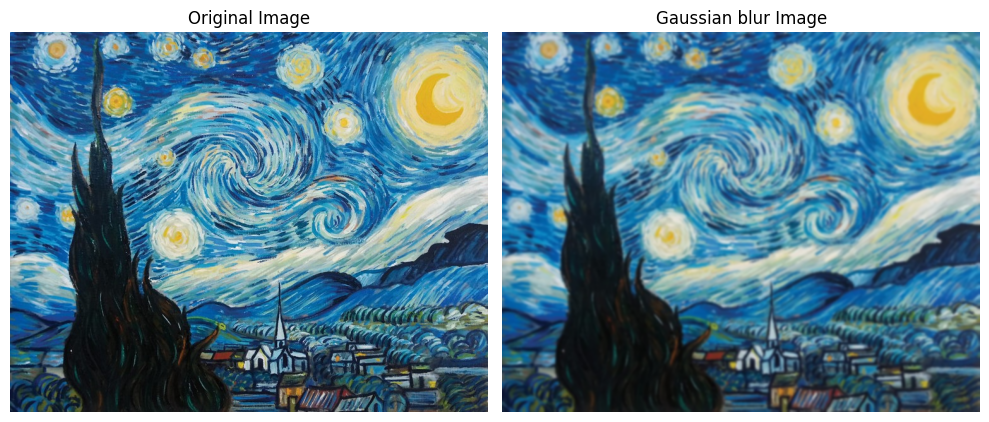

In [168]:
# Display input and output images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Gaussian blur Image')
plt.imshow(cv2.cvtColor(blur_input_image, cv2.COLOR_BGR2RGB) )
plt.axis('off')

plt.tight_layout()
plt.show()

In [148]:

# Define parameters for Mean Shift
spatial_radius = 10
range_radius = 25

# Apply Mean Shift segmentation
segmented_image = mean_shift_segmentation(input_image, spatial_radius, range_radius , 5 , False , False)





Iteration 1/5
Iteration 2/5
Iteration 3/5
Iteration 4/5
Iteration 5/5


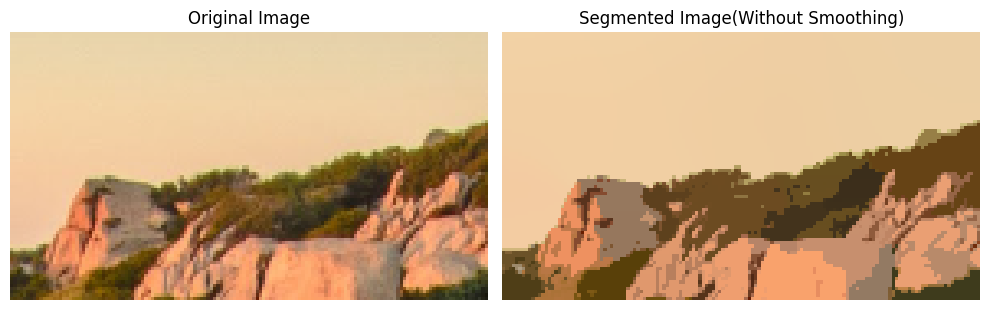

In [150]:
# Display input and output images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image(Without Smoothing)')
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB) )
plt.axis('off')

plt.tight_layout()
plt.show()


In [139]:
# Save the segmented image
cv2.imwrite('segmented_image.jpg', segmented_image )

True

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.spatial import KDTree

class MeanShiftSegmentation:
    def __init__(self, spatial_radius, range_radius, max_iterations=100, use_gaussian_weights=True, handle_outliers=True):
        """
        Initialize the MeanShiftSegmentation class.

        Parameters:
            spatial_radius (float): Spatial domain kernel radius.
            range_radius (float): Range domain kernel radius.
            max_iterations (int): Maximum number of iterations.
            use_gaussian_weights (bool): Whether to apply Gaussian weights.
            handle_outliers (bool): Whether to handle outliers.
        """
        self.spatial_radius = spatial_radius
        self.range_radius = range_radius
        self.max_iterations = max_iterations
        self.use_gaussian_weights = use_gaussian_weights
        self.handle_outliers = handle_outliers

    def preprocess_image(self):
        """
        Load and preprocess the input image.

        Parameters:
            image_path (str): Path to the input image.

        Returns:
            image (ndarray): Preprocessed RGB image.
        """
        
        image = cv2.GaussianBlur(self.input_image, (9, 9), 0)  # Apply Gaussian blur to reduce noise
        return image
    
    def read_image(self ,image_path):
        self.input_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB) 

    def segment(self, image):
        """
        Apply Mean Shift segmentation to an image.

        Parameters:
            image (ndarray): Input RGB image.

        Returns:
            segmented_image (ndarray): Segmented RGB image.
        """
        # Convert the image to a 5D array: spatial (x, y) + color (R, G, B)
        height, width, channels = image.shape
        flat_image = np.zeros((height * width, 5), dtype=np.float32)

        for y in range(height):
            for x in range(width):
                flat_image[y * width + x] = np.array([x, y, *image[y, x]])

        # Build a KD-tree for fast neighbor lookup
        kd_tree = KDTree(flat_image[:, :2])

        # Mean Shift procedure
        for iteration in range(self.max_iterations):
            print(f"Iteration {iteration + 1}/{self.max_iterations}")
            for i in range(flat_image.shape[0]):
                point = flat_image[i]

                # Query neighbors within spatial radius
                spatial_neighbors = kd_tree.query_ball_point(point[:2], self.spatial_radius)

                distances = np.linalg.norm(flat_image[spatial_neighbors, :2] - point[:2], axis=1)
                color_distances = np.linalg.norm(flat_image[spatial_neighbors, 2:] - point[2:], axis=1)

                mask = (distances < self.spatial_radius) & (color_distances < self.range_radius)
                neighbors = np.array(spatial_neighbors)[mask]

                if self.use_gaussian_weights:
                    # Apply Gaussian weights
                    spatial_weights = np.exp(-(distances[mask]**2) / (2 * (self.spatial_radius**2)))
                    range_weights = np.exp(-(color_distances[mask]**2) / (2 * (self.range_radius**2)))
                    weights = spatial_weights * range_weights

                    weighted_sum = np.sum(flat_image[neighbors] * weights[:, np.newaxis], axis=0)
                    flat_image[i] = weighted_sum / np.sum(weights)
                else:
                    # Simple mean without weights
                    flat_image[i] = np.mean(flat_image[neighbors], axis=0)

        if self.handle_outliers:
            # Handle outliers
            mean_colors = np.mean(flat_image[:, 2:], axis=0)
            std_colors = np.std(flat_image[:, 2:], axis=0)
            threshold = 3 * std_colors  # Define outliers as points beyond 3 standard deviations
            for i in range(flat_image.shape[0]):
                color_distance = np.abs(flat_image[i, 2:] - mean_colors)
                if np.any(color_distance > threshold):
                    flat_image[i, 2:] = mean_colors  # Replace outliers with the mean color

        # Reshape the flat_image back to the original image shape
        segmented_image = flat_image[:, 2:].reshape((height, width, channels)).astype(np.uint8)
        return segmented_image

    def display_results(self, original_image, segmented_image , process='Segmented Image'):
        """
        Display the original and segmented images.

        Parameters:
            original_image (ndarray): Original RGB image.
            segmented_image (ndarray): Segmented RGB image.
        """
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.title('Original Image')
        plt.imshow(original_image)
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.title(process )
        plt.imshow(segmented_image)
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    def save_image(self, image, output_path):
        """
        Save the segmented image.

        Parameters:
            image (ndarray): Segmented RGB image.
            output_path (str): Path to save the image.
        """
        cv2.imwrite(output_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))




In [19]:

spatial_radius = 10
range_radius = 25
max_iterations = 5

# Initialize the MeanShiftSegmentation class
mean_shift = MeanShiftSegmentation(spatial_radius, range_radius, max_iterations, use_gaussian_weights=False, handle_outliers=False)
mean_shift.read_image('b.jpg')


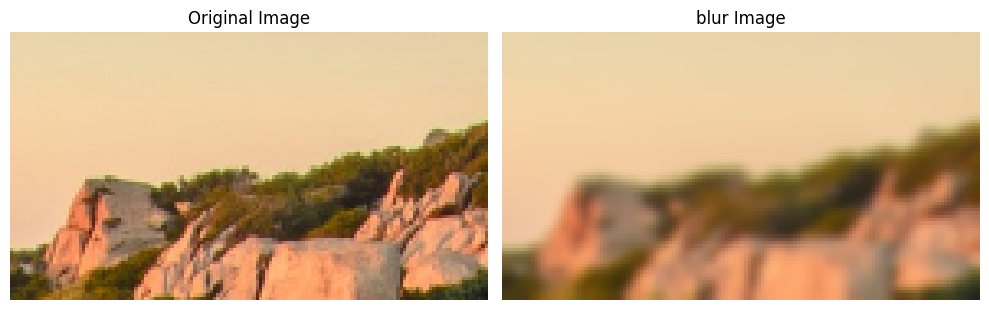

In [24]:
# Preprocess the input image
input_blur_image = mean_shift.preprocess_image()
mean_shift.display_results(mean_shift.input_image  , input_blur_image,'blur Image')

In [25]:
# Apply Mean Shift segmentation
segmented_image = mean_shift.segment(input_blur_image)


Iteration 1/7
Iteration 2/7
Iteration 3/7
Iteration 4/7
Iteration 5/7
Iteration 6/7
Iteration 7/7


c:\Users\akgh1\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\akgh1\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\akgh1\AppData\Local\Temp\ipykernel_1324\1392612131.py:100: RuntimeWarning: invalid value encountered in cast
  segmented_image = flat_image[:, 2:].reshape((height, width, channels)).astype(np.uint8)


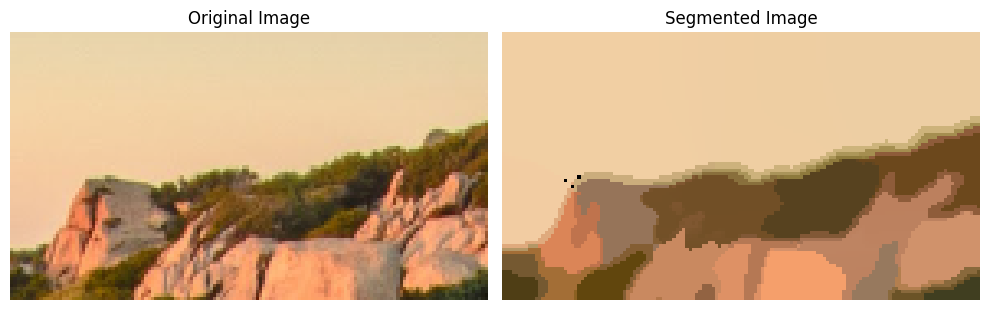

In [26]:
mean_shift.display_results(mean_shift.input_image, segmented_image)

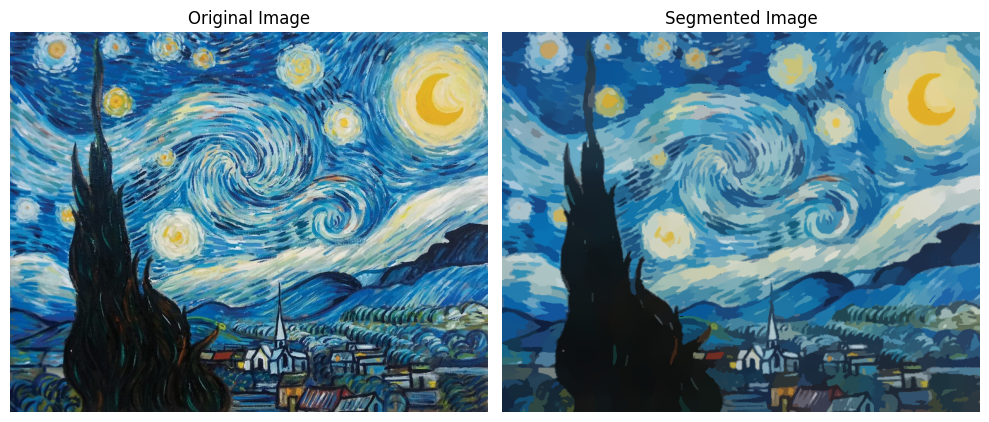

In [198]:
# Display results
mean_shift.display_results(input_image, segmented_image)

In [ ]:

# Save the segmented image
mean_shift.save_image(segmented_image, 'segmented_image.jpg')